**Hands-On 1: In-modelling XAI techniques**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from pygam import LinearGAM, s

ModuleNotFoundError: No module named 'pygam'

In [ ]:
# datasets
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer

**Linear Regression**

In [ ]:
housing = fetch_california_housing()
print(housing.keys())
print(housing.DESCR)
print(housing.data.shape)
print(housing.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
np.min(y), np.max(y)

(0.14999, 5.00001)

In [ ]:
# Fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients

MedInc        0.436693
HouseAge      0.009436
AveRooms     -0.107322
AveBedrms     0.645066
Population   -0.000004
AveOccup     -0.003787
Latitude     -0.421314
Longitude    -0.434514
dtype: float64

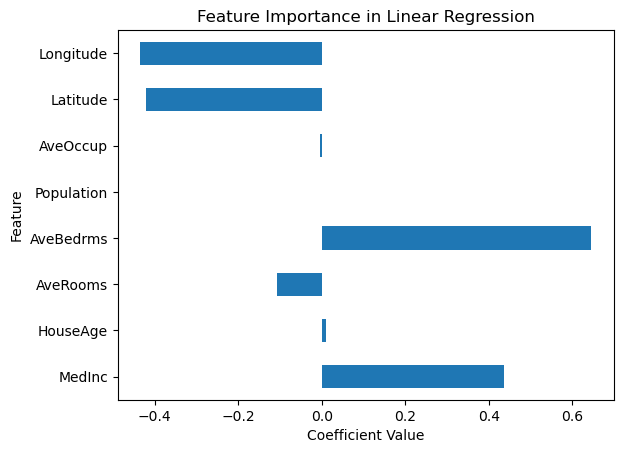

In [ ]:
coefficients.plot(kind='barh')
plt.title("Feature Importance in Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

Text(0.5, 1.0, 'Correlation between features')

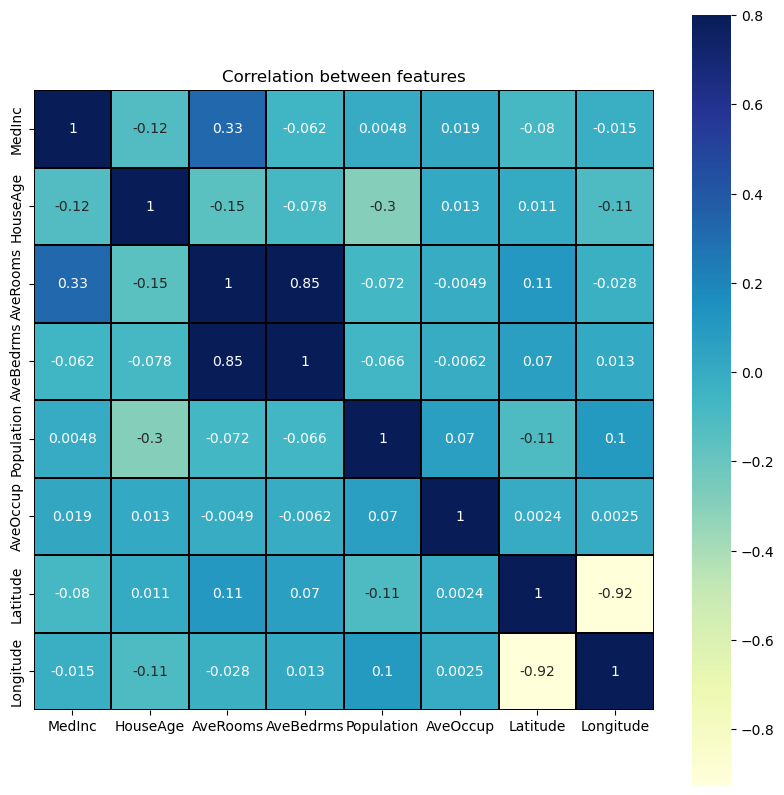

In [ ]:
corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**GAM**

In [ ]:
gam = LinearGAM()
gam.fit(X,y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     89.0942
Link Function:                     IdentityLink Log Likelihood:                                -25828.7454
Number of Samples:                        20640 AIC:                                            51837.6794
                                                AICc:                                           51838.4782
                                                GCV:                                                0.3966
                                                Scale:                                              0.3936
                                                Pseudo R-Squared:                                   0.7057
Feature Function                  Lam

/var/folders/f0/z2rkmwt123z5g8bktvdl_8h00000gn/T/ipykernel_31812/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


titles = X.columns[0:len(X.columns)]
plt.figure()
fig, axs = plt.subplots(8,figsize=(5,20))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=.5)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i,X=XX,width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[:, 1], c='grey', ls='--')
    ax.set_title(titles[i],fontsize=12)

**Decision Tree**

In [ ]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [ ]:
# Fit Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

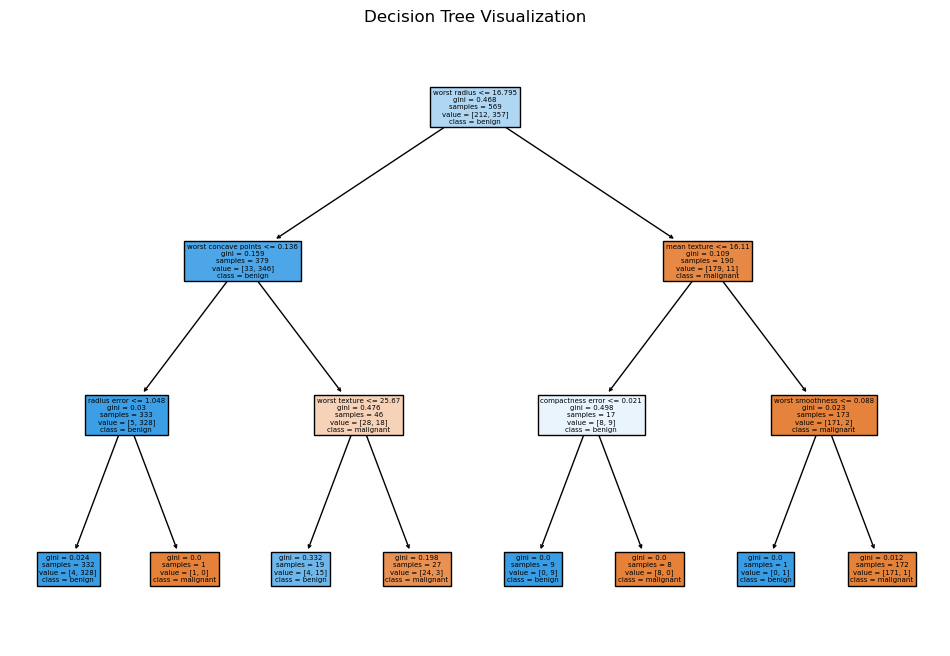

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

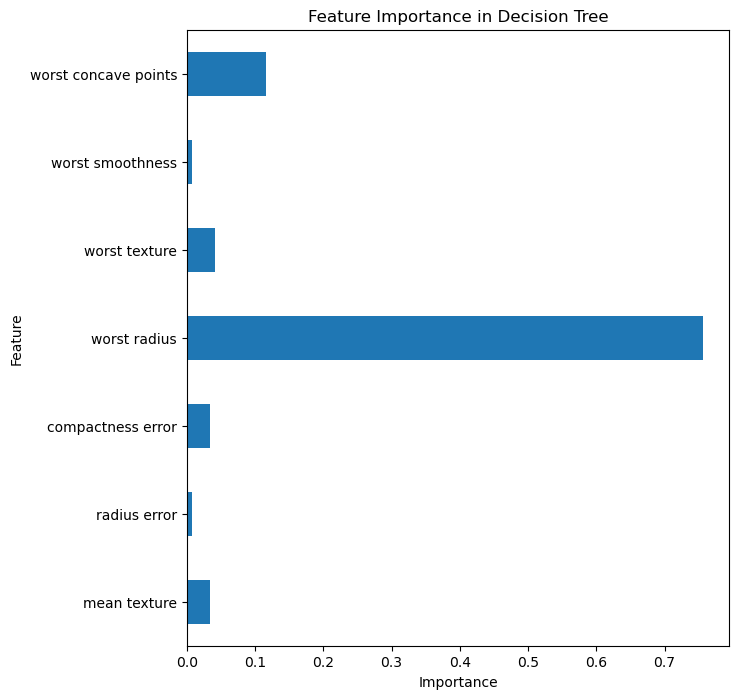

In [ ]:
# Feature importance
importances = pd.Series(tree_clf.feature_importances_, index=cancer.feature_names)
importances = importances[importances > 0]  # Only show non-zero importance
importances.plot(kind='barh',figsize=(7,8))
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()